# **Iris Flowers Classification ML Project**

### ***Now input the libries***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Mount the drive and import the datset

In [2]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the seol bike data set from drive
iris_df=pd.read_csv('/content/drive/MyDrive/LetsGrowMore(task 1)/Iris.csv',encoding ='latin')

Understand More About The Data

In [5]:
# Viewing the data of top 5 rows to take a glimps of the data
iris_df.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

In [6]:
# View the data of bottom 5 rows to take a glimps of the data
iris_df.tail()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica

In [7]:
#Getting the shape of dataset with rows and columns
print(iris_df.shape)

(150, 6)


In [8]:
#Getting all the columns
print("Features of the dataset:")
iris_df.columns

Features of the dataset:


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
#check details about the data set
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
#print the unique value
iris_df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [11]:
#Looking for the description of the dataset to get insights of the data
iris_df.describe().T

count       mean        std  min    25%    50%     75%    max
Id             150.0  75.500000  43.445368  1.0  38.25  75.50  112.75  150.0
SepalLengthCm  150.0   5.843333   0.828066  4.3   5.10   5.80    6.40    7.9
SepalWidthCm   150.0   3.054000   0.433594  2.0   2.80   3.00    3.30    4.4
PetalLengthCm  150.0   3.758667   1.764420  1.0   1.60   4.35    5.10    6.9
PetalWidthCm   150.0   1.198667   0.763161  0.1   0.30   1.30    1.80    2.5

## Missing values

In [13]:
#check for count of missing values in each column.
iris_df.isna().sum()
iris_df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


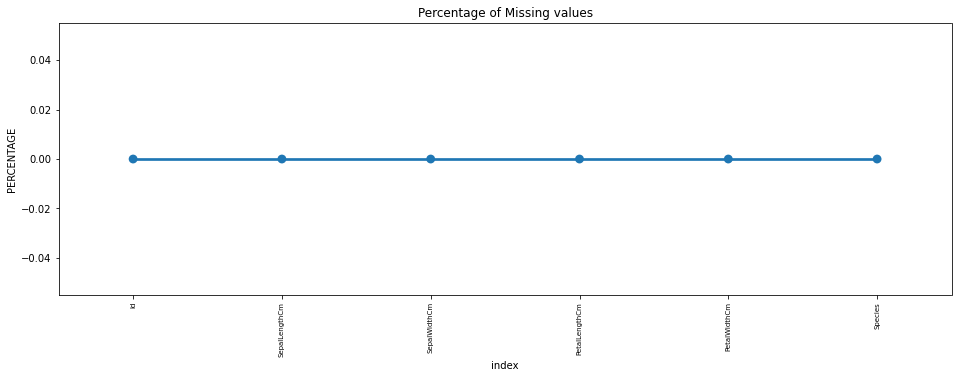

In [15]:
missing = pd.DataFrame((iris_df.isnull().sum())*100/iris_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

## Their is no mising value

## Duplicate values

In [17]:
# Checking Duplicate Values
value=len(iris_df[iris_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


Label Encoding the non-numeric columns

In [23]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()

In [27]:
dfle = iris_df
dfle['Species'] = le.fit_transform(dfle['Species'])

In [28]:
dfle.head()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0   1            5.1           3.5            1.4           0.2        0
1   2            4.9           3.0            1.4           0.2        0
2   3            4.7           3.2            1.3           0.2        0
3   4            4.6           3.1            1.5           0.2        0
4   5            5.0           3.6            1.4           0.2        0

In [29]:
dfle

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0      1            5.1           3.5            1.4           0.2        0
1      2            4.9           3.0            1.4           0.2        0
2      3            4.7           3.2            1.3           0.2        0
3      4            4.6           3.1            1.5           0.2        0
4      5            5.0           3.6            1.4           0.2        0
..   ...            ...           ...            ...           ...      ...
145  146            6.7           3.0            5.2           2.3        2
146  147            6.3           2.5            5.0           1.9        2
147  148            6.5           3.0            5.2           2.0        2
148  149            6.2           3.4            5.4           2.3        2
149  150            5.9           3.0            5.1           1.8        2

[150 rows x 6 columns]

: Separating out the dependent and independent columns

In [30]:
x = dfle.drop('Species',axis='columns')
y = dfle.Species

In [31]:
x

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]

In [32]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [33]:
x.drop('Id',axis='columns')

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]

Scaling the data

In [34]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler()
scaled_df = min_max.fit_transform(x.values)

In [35]:
scaled_df

array([[0.        , 0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.00671141, 0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.01342282, 0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.02013423, 0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.02684564, 0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.03355705, 0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.04026846, 0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.04697987, 0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.05369128, 0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.06040268, 0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.06711409, 0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.0738255 , 0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.08053691, 0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.08724832, 0.        , 0.41666667, 0.01694915, 0.        ],
       [0.09395973, 0.41666667, 0.

In [36]:
final_df = pd.DataFrame(scaled_df,columns=["Id","SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"])

In [37]:
final_df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0    0.000000       0.222222      0.625000       0.067797      0.041667
1    0.006711       0.166667      0.416667       0.067797      0.041667
2    0.013423       0.111111      0.500000       0.050847      0.041667
3    0.020134       0.083333      0.458333       0.084746      0.041667
4    0.026846       0.194444      0.666667       0.067797      0.041667
..        ...            ...           ...            ...           ...
145  0.973154       0.666667      0.416667       0.711864      0.916667
146  0.979866       0.555556      0.208333       0.677966      0.750000
147  0.986577       0.611111      0.416667       0.711864      0.791667
148  0.993289       0.527778      0.583333       0.745763      0.916667
149  1.000000       0.444444      0.416667       0.694915      0.708333

[150 rows x 5 columns]

In [38]:
final_df.drop("Id",axis='columns')

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0         0.222222      0.625000       0.067797      0.041667
1         0.166667      0.416667       0.067797      0.041667
2         0.111111      0.500000       0.050847      0.041667
3         0.083333      0.458333       0.084746      0.041667
4         0.194444      0.666667       0.067797      0.041667
..             ...           ...            ...           ...
145       0.666667      0.416667       0.711864      0.916667
146       0.555556      0.208333       0.677966      0.750000
147       0.611111      0.416667       0.711864      0.791667
148       0.527778      0.583333       0.745763      0.916667
149       0.444444      0.416667       0.694915      0.708333

[150 rows x 4 columns]

Splitting the dataset into test and train set

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(final_df,y,test_size=0.2)

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [42]:
model1.fit(x_train,y_train)

LogisticRegression()

In [43]:
print("The Accuracy using Logistic Regression is :", (model1.score(x_test,y_test))*100)

The Accuracy using Logistic Regression is : 100.0


## Linear Regresion

In [45]:
from sklearn.linear_model import LinearRegression

In [48]:
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression()

In [49]:
print("The Accuracy using Linear Regression is :", (model2.score(x_test,y_test))*100)

The Accuracy using Linear Regression is : 95.5571836565393


## Decision Tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()

In [68]:
model3.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
print("The Accuracy using Decision tree is :", (model3.score(x_test,y_test))*100)

The Accuracy using Decision tree is : 100.0


## Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()

In [56]:
model4.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
print("The Accuracy using RaNDOMforest is :", (model4.score(x_test,y_test))*100)

The Accuracy using RaNDOMforest is : 100.0


In [59]:
from sklearn.svm import SVC
model5 = SVC()

In [60]:
model5.fit(x_train,y_train)

SVC()

In [61]:
print("The Accuracy using SVM is :", (model4.score(x_test,y_test))*100)

The Accuracy using SVM is : 100.0


### XGBClassifier

In [62]:
from xgboost import XGBClassifier
model6 = XGBClassifier()

In [63]:
model6.fit(x_train,y_train)

XGBClassifier(objective='multi:softprob')

In [70]:
print("The Accuracy using XGBclassifier is :", (model4.score(x_test,y_test))*100)

The Accuracy using XGBclassifier is : 100.0
